In [113]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import warnings                                
warnings.filterwarnings('ignore')

In [114]:
#reading data set and converting string date column into datetime
df = pd.read_csv('../../Data-Sets/female_birth_ts.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

In [115]:
df.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


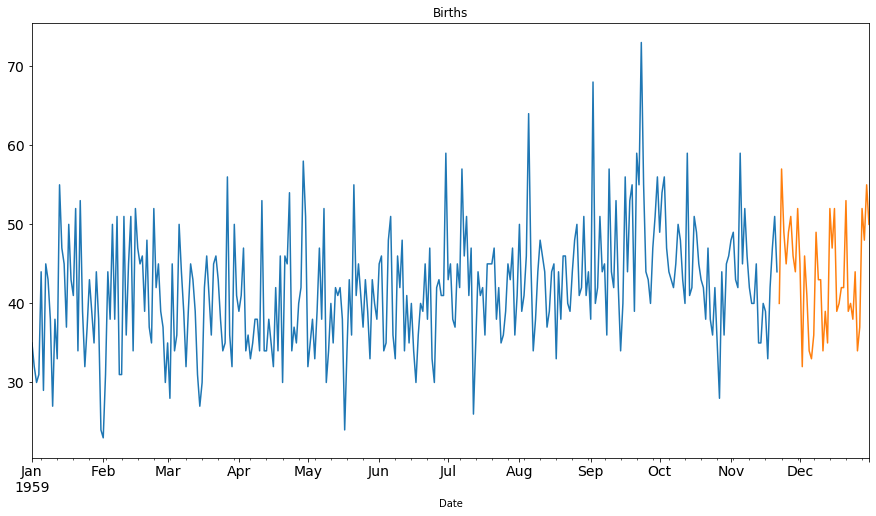

In [116]:
##train-testsplit
train=df[0:325].copy()
train.Births=train.Births.astype('double')
test=df[325:].copy()
#Plotting data
train.Births.plot(figsize=(15,8), title= 'Births', fontsize=14)
test.Births.plot(figsize=(15,8), title= 'Births', fontsize=14)
plt.show()

### __Naive Method__

In [117]:
#last value of the dataframe
print('Last day of train data set:',train.Births.iloc[-1])
test['yhat_naive'] = train.Births.iloc[-1]
print('rmse:',sqrt(mean_squared_error(test.Births, test.yhat_naive)))
print('mse:',mean_absolute_error(test.Births, test.yhat_naive))

Last day of train data set: 44.0
rmse: 6.631364867054142
mse: 5.625


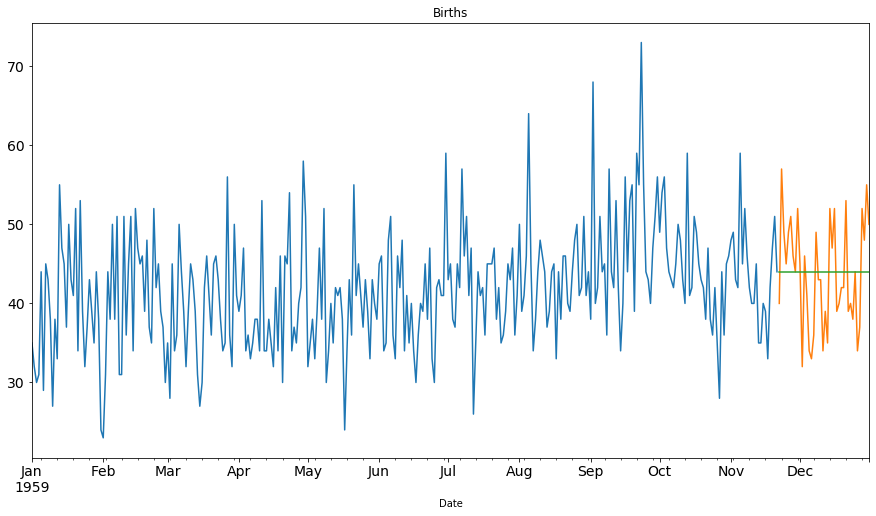

In [118]:
#Plotting data
train.Births.plot(figsize=(15,8), title= 'Births', fontsize=14)
test.Births.plot(figsize=(15,8), title= 'Births', fontsize=14)
test.yhat_naive.plot(figsize=(15,8), title= 'Births', fontsize=14)
plt.show()

### __Simple Average__

In [119]:
#calculating the average of the data set
print('Average of the train data set:',round(train.Births.mean()))
test['yhat_simple_average'] = round(train.Births.mean())
print('rmse:',sqrt(mean_squared_error(test.Births, test.yhat_simple_average)))
print('mse:',mean_absolute_error(test.Births, test.yhat_simple_average))

Average of the train data set: 42
rmse: 6.831910420958401
mse: 5.725


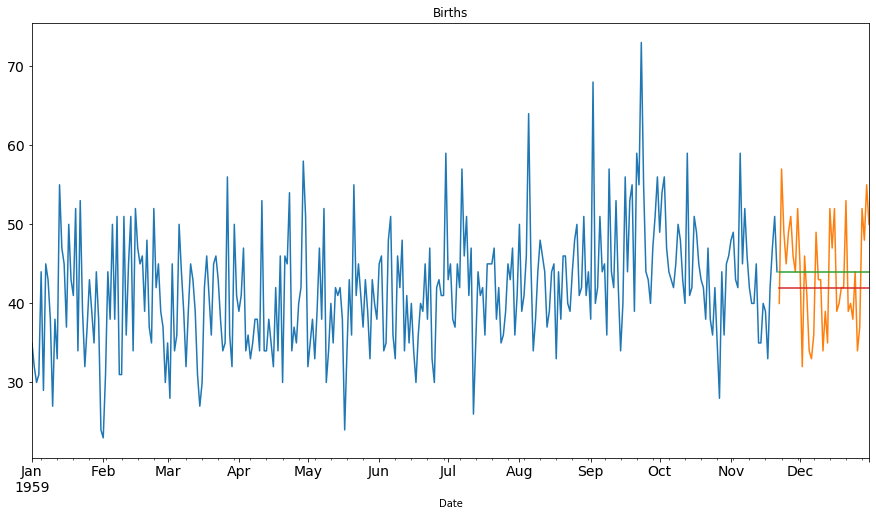

In [120]:
#Plotting data
train.Births.plot(figsize=(15,8), title= 'Births', fontsize=14)
test.Births.plot(figsize=(15,8), title= 'Births', fontsize=14)
test.yhat_naive.plot(figsize=(15,8), title= 'Births', fontsize=14)
test.yhat_simple_average.plot(figsize=(15,8), title= 'Births', fontsize=14)
plt.show()

### __Moving Average Method__

In [121]:
def rolling_mean(series=None, window=None):
    #calculating rolling mean and visualising with the original series

    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

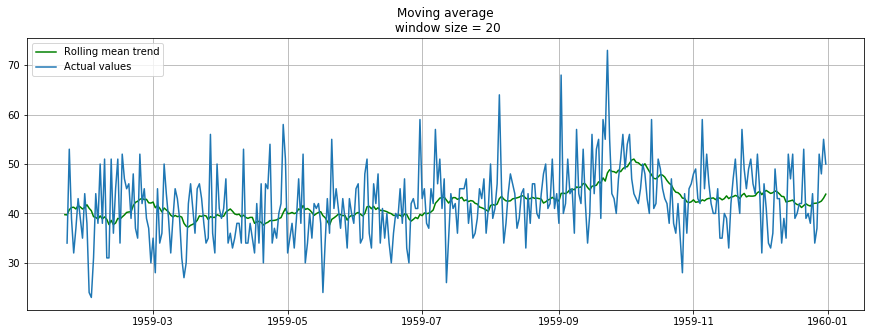

In [122]:
rolling_mean(df,20)

In [123]:
print('Rolling mean of the last n day train data set:',train.Births.rolling(window=5).mean().iloc[-1])
test['yhat_moving_average'] = train.Births.rolling(window=5).mean().iloc[-1]
print('rmse:',sqrt(mean_squared_error(test.Births, test.yhat_moving_average)))
print('mse:',mean_absolute_error(test.Births, test.yhat_moving_average))

Rolling mean of the last n day train data set: 43.4
rmse: 6.629102503355941
mse: 5.625


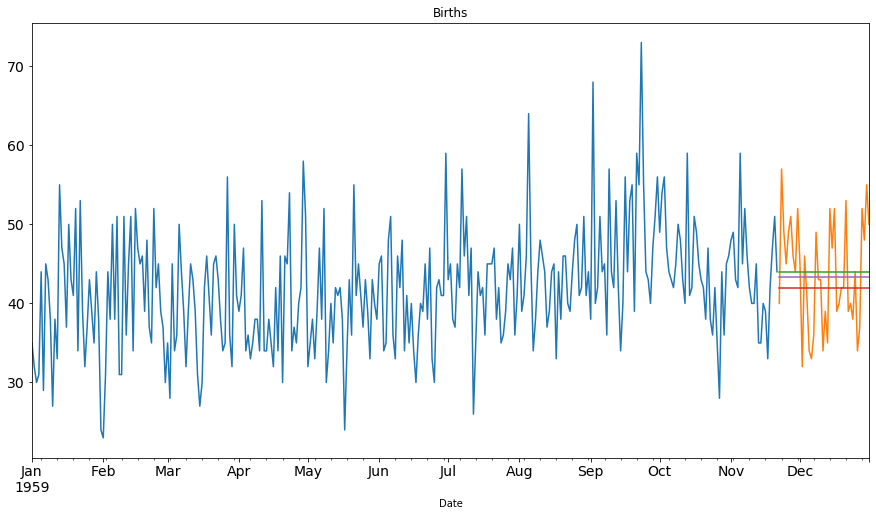

In [124]:
#Plotting data
train.Births.plot(figsize=(15,8), title= 'Births', fontsize=14)
test.Births.plot(figsize=(15,8), title= 'Births', fontsize=14)
test.yhat_naive.plot(figsize=(15,8), title= 'Births', fontsize=14)
test.yhat_simple_average.plot(figsize=(15,8), title= 'Births', fontsize=14)
test.yhat_moving_average.plot(figsize=(15,8), title= 'Births', fontsize=14)
plt.show()

### __Decomposition__

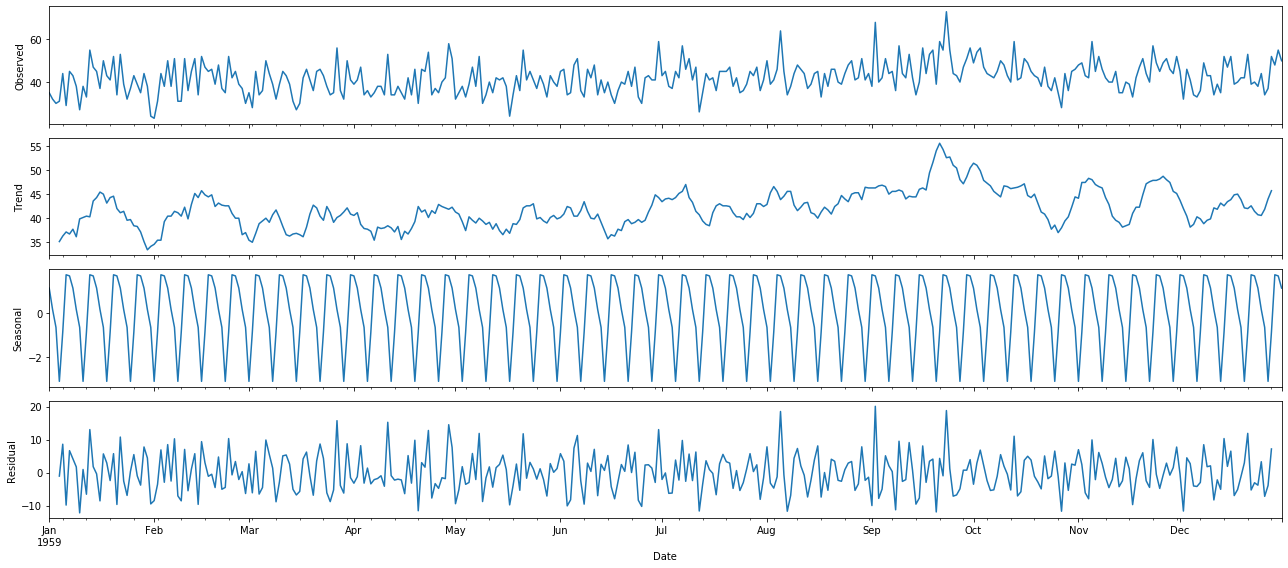

In [125]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(df.Births, model='additive')
fig = decomposition.plot()
plt.show()

## __Explonential Smoothing__

### __Simple Explonential Smoothing__

In [149]:
ses = SimpleExpSmoothing(train.Births).fit()
print('Explonential smoothing with optimised alpha:',ses.forecast(1).iloc[0])
test['yhat_simple_explonential_smoothing'] = ses.forecast(1).iloc[0]
print('rmse:',sqrt(mean_squared_error(test.Births, test.yhat_simple_explonential_smoothing)))
print('mse:',mean_absolute_error(test.Births, test.yhat_simple_explonential_smoothing))

Explonential smoothing with optimised alpha: 43.26033854320109
rmse: 6.6363633959989405
mse: 5.625


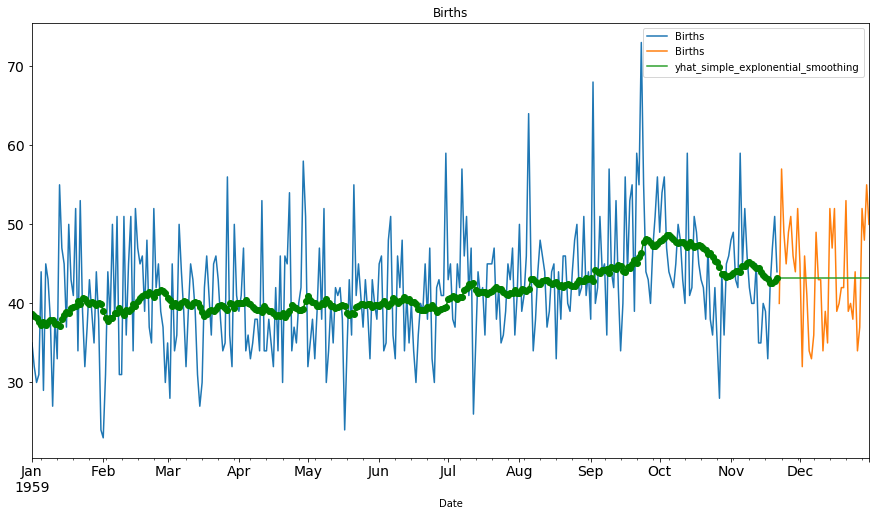

In [165]:
#Plotting data
train.Births.plot(figsize=(15,8), title= 'Births', fontsize=14, legend=True)
test.Births.plot(figsize=(15,8), title= 'Births', fontsize=14, legend=True)
test.yhat_simple_explonential_smoothing.plot(figsize=(15,8), title= 'Births', fontsize=14, legend=True)
ses.fittedvalues.plot(marker='o', color='green')
plt.show()

### __Holt's Linear Trend__

In [187]:
holt_ = Holt(train.Births).fit()
test['yhat_holts_linear_trend'] = holt_.forecast(len(test))
print(test['yhat_holts_linear_trend'].head())
print('rmse:',sqrt(mean_squared_error(test.Births, test.yhat_holts_linear_trend)))
print('mse:',mean_absolute_error(test.Births, test.yhat_holts_linear_trend))

Date
1959-11-22    43.796683
1959-11-23    43.812965
1959-11-24    43.829246
1959-11-25    43.845528
1959-11-26    43.861809
Name: yhat_holts_linear_trend, dtype: float64
rmse: 6.650185813578663
mse: 5.671819193684614


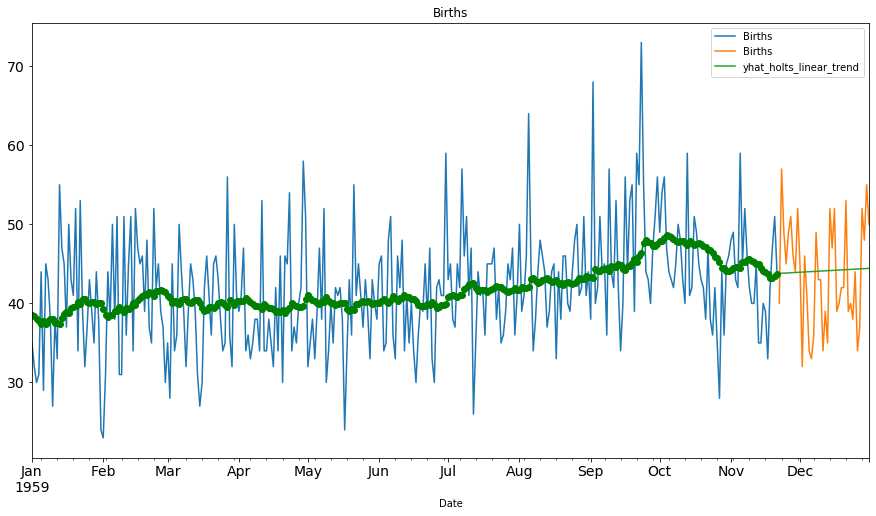

In [188]:
#Plotting data
train.Births.plot(figsize=(15,8), title= 'Births', fontsize=14, legend=True)
test.Births.plot(figsize=(15,8), title= 'Births', fontsize=14, legend=True)
test.yhat_holts_linear_trend.plot(figsize=(15,8), title= 'Births', fontsize=14, legend=True)
holt_.fittedvalues.plot(marker='o', color='green')
plt.show()

In [176]:
holt_.params

{'smoothing_level': 0.045841004941618094,
 'smoothing_slope': 0.0,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 38.4889062004288,
 'initial_slope': 0.0162814347130714,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

### __Holt-Winter's Seasonal Method__

In [203]:
holt_winter_1 = ExponentialSmoothing(train.Births,trend='add', seasonal='add', seasonal_periods=7, damped=False).fit()
holt_winter_2 = ExponentialSmoothing(train.Births,trend='add', seasonal='add', seasonal_periods=7, damped=True).fit()
holt_winter_3 = ExponentialSmoothing(train.Births,trend='add', seasonal='mul', seasonal_periods=7, damped=False).fit()
holt_winter_4 = ExponentialSmoothing(train.Births,trend='add', seasonal='mul', seasonal_periods=7, damped=True).fit()
holt_winter_5 = ExponentialSmoothing(train.Births,trend='mul', seasonal='add', seasonal_periods=7, damped=False).fit()
holt_winter_6 = ExponentialSmoothing(train.Births,trend='mul', seasonal='add', seasonal_periods=7, damped=True).fit()
holt_winter_7 = ExponentialSmoothing(train.Births,trend='mul', seasonal='mul', seasonal_periods=7, damped=True).fit()
holt_winter_8 = ExponentialSmoothing(train.Births,trend='mul', seasonal='mul', seasonal_periods=7, damped=False).fit()
test['yhat_holt_winter_1'] = holt_winter_1.forecast(len(test))
test['yhat_holt_winter_2'] = holt_winter_2.forecast(len(test))
test['yhat_holt_winter_3'] = holt_winter_3.forecast(len(test))
test['yhat_holt_winter_4'] = holt_winter_4.forecast(len(test))
test['yhat_holt_winter_5'] = holt_winter_5.forecast(len(test))
test['yhat_holt_winter_6'] = holt_winter_6.forecast(len(test))
test['yhat_holt_winter_7'] = holt_winter_7.forecast(len(test))
test['yhat_holt_winter_8'] = holt_winter_8.forecast(len(test))
print('rmse 1:',sqrt(mean_squared_error(test.Births, test.yhat_holt_winter_1)))
print('rmse 2:',sqrt(mean_squared_error(test.Births, test.yhat_holt_winter_2)))
print('rmse 3:',sqrt(mean_squared_error(test.Births, test.yhat_holt_winter_3)))
print('rmse 4:',sqrt(mean_squared_error(test.Births, test.yhat_holt_winter_4)))
print('rmse 5:',sqrt(mean_squared_error(test.Births, test.yhat_holt_winter_5)))
print('rmse 6:',sqrt(mean_squared_error(test.Births, test.yhat_holt_winter_6)))
print('rmse 7:',sqrt(mean_squared_error(test.Births, test.yhat_holt_winter_7)))
print('rmse 8:',sqrt(mean_squared_error(test.Births, test.yhat_holt_winter_8)))
print('mse_1:',mean_absolute_error(test.Births, test.yhat_holt_winter_1))
print('mse_2:',mean_absolute_error(test.Births, test.yhat_holt_winter_2))
print('mse_3:',mean_absolute_error(test.Births, test.yhat_holt_winter_3))
print('mse_4:',mean_absolute_error(test.Births, test.yhat_holt_winter_4))
print('mse_5:',mean_absolute_error(test.Births, test.yhat_holt_winter_5))
print('mse_6:',mean_absolute_error(test.Births, test.yhat_holt_winter_6))
print('mse_7:',mean_absolute_error(test.Births, test.yhat_holt_winter_7))
print('mse_8:',mean_absolute_error(test.Births, test.yhat_holt_winter_8))

rmse 1: 6.632754444475551
rmse 2: 7.3672874831784085
rmse 3: 6.641208560610018
rmse 4: 7.330360591089206
rmse 5: 6.706097284159225
rmse 6: 6.827032294850172
rmse 7: 7.329935289939291
rmse 8: 6.639859840662573
mse_1: 5.454439795037834
mse_2: 6.121823958542385
mse_3: 5.462559160685804
mse_4: 6.111704936671389
mse_5: 5.530072032039958
mse_6: 5.697336454586262
mse_7: 6.111616539833098
mse_8: 5.460022756684269


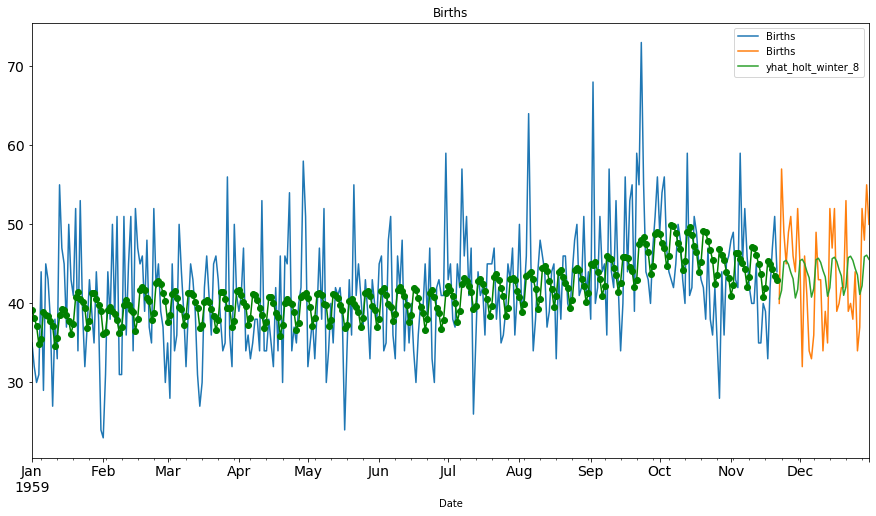

In [213]:
#Plotting data
train.Births.plot(figsize=(15,8), title= 'Births', fontsize=14, legend=True)
test.Births.plot(figsize=(15,8), title= 'Births', fontsize=14, legend=True)
test.yhat_holt_winter_8.plot(figsize=(15,8), title= 'Births', fontsize=14, legend=True)
holt_winter_8.fittedvalues.plot(marker='o', color='green')
plt.show()

In [214]:
holt_winter_8.params

{'smoothing_level': 0.04439116260654052,
 'smoothing_slope': 1.765766750141598e-45,
 'smoothing_seasonal': 5.036669298249867e-38,
 'damping_slope': nan,
 'initial_level': 6.200206148275132,
 'initial_slope': 1.0001628973503942,
 'initial_seasons': array([0.96240179, 0.9533631 , 0.94606262, 0.92366313, 0.9334449 ,
        0.96560545, 0.96705349]),
 'use_boxcox': True,
 'lamda': 0.24669974829859997,
 'remove_bias': False}

<Figure size 1296x576 with 0 Axes>

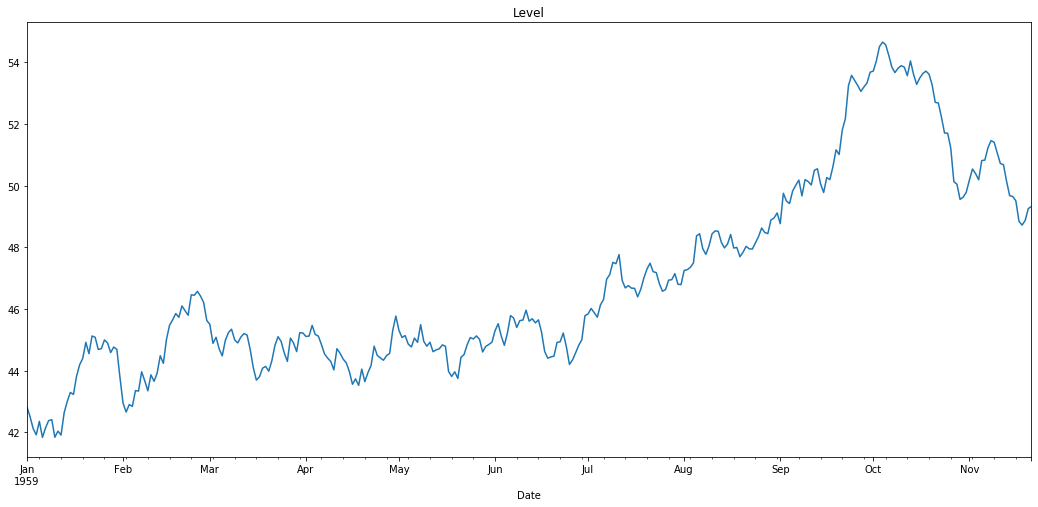

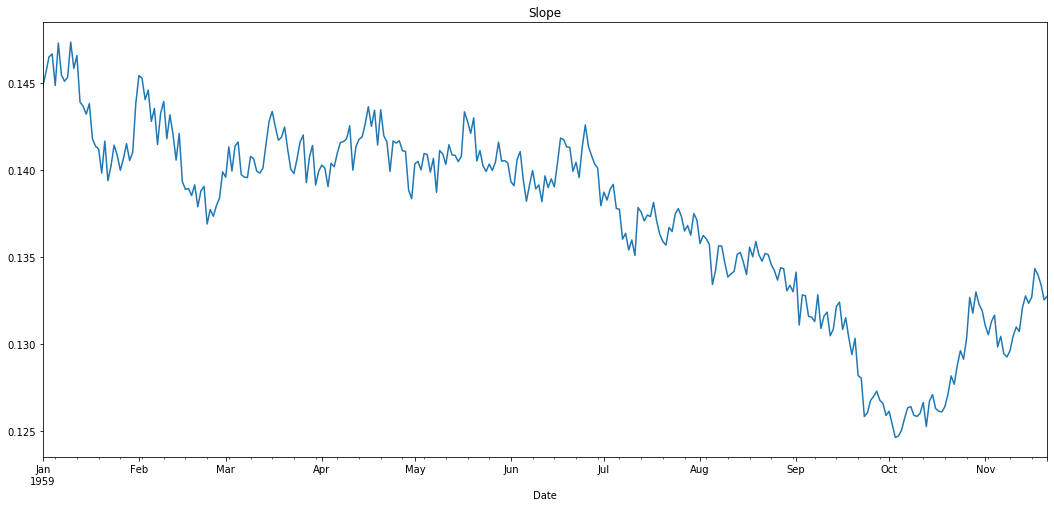

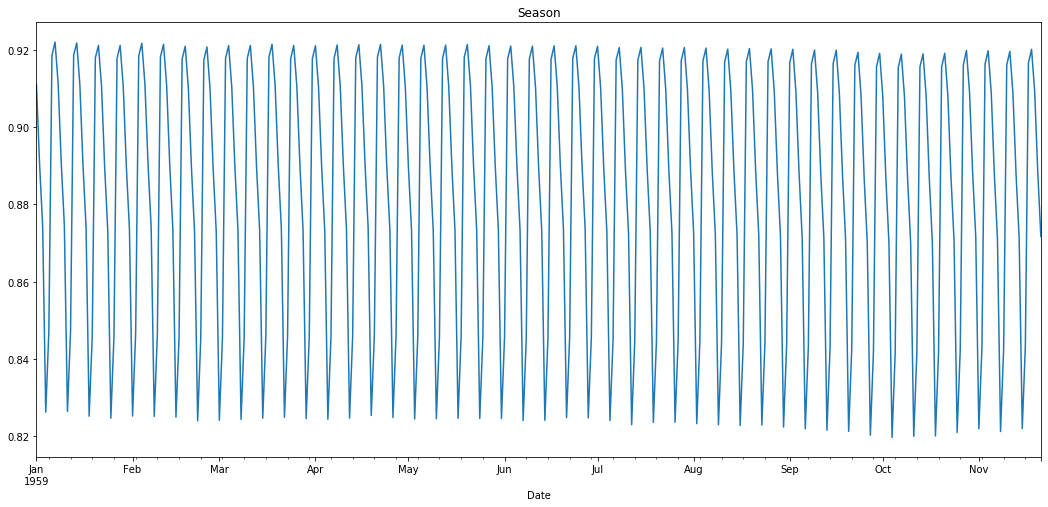

<Figure size 1296x576 with 0 Axes>

In [209]:
holt_winter_8.level.plot(title='Level')
plt.figure()
holt_winter_8.slope.plot(title='Slope')
plt.figure()
holt_winter_8.season.plot(title='Season')
plt.figure()